In [1]:
import os
import numpy as np
import random

file = open("E:/UNet/data/train.txt", "r")
names = file.read()
print(names)

2007_000032
2007_000039
2007_000063
2007_000068
2007_000121
2007_000170
2007_000241
2007_000243
2007_000250
2007_000256
2007_000333
2007_000363
2007_000364
2007_000392
2007_000480
2007_000504
2007_000515
2007_000528
2007_000549
2007_000584
2007_000645
2007_000648
2007_000713
2007_000720
2007_000733
2007_000738
2007_000768
2007_000793
2007_000822
2007_000836
2007_000876
2007_000904
2007_001027
2007_001073
2007_001149
2007_001185
2007_001225
2007_001340
2007_001397
2007_001416
2007_001420
2007_001439
2007_001487
2007_001595
2007_001602
2007_001609
2007_001698
2007_001704
2007_001709
2007_001724
2007_001764
2007_001825
2007_001834
2007_001857
2007_001872
2007_001901
2007_001917
2007_001960
2007_002024
2007_002055
2007_002088
2007_002099
2007_002105
2007_002107
2007_002120
2007_002142
2007_002198
2007_002212
2007_002216
2007_002227
2007_002234
2007_002273
2007_002281
2007_002293
2007_002361
2007_002368
2007_002370
2007_002403
2007_002462
2007_002488
2007_002545
2007_002611
2007_002639
2007

In [2]:
print(names[11])

In [3]:
import re
name = re.split("\n", names)

In [4]:
print(name)

['2007_000032', '2007_000039', '2007_000063', '2007_000068', '2007_000121', '2007_000170', '2007_000241', '2007_000243', '2007_000250', '2007_000256', '2007_000333', '2007_000363', '2007_000364', '2007_000392', '2007_000480', '2007_000504', '2007_000515', '2007_000528', '2007_000549', '2007_000584', '2007_000645', '2007_000648', '2007_000713', '2007_000720', '2007_000733', '2007_000738', '2007_000768', '2007_000793', '2007_000822', '2007_000836', '2007_000876', '2007_000904', '2007_001027', '2007_001073', '2007_001149', '2007_001185', '2007_001225', '2007_001340', '2007_001397', '2007_001416', '2007_001420', '2007_001439', '2007_001487', '2007_001595', '2007_001602', '2007_001609', '2007_001698', '2007_001704', '2007_001709', '2007_001724', '2007_001764', '2007_001825', '2007_001834', '2007_001857', '2007_001872', '2007_001901', '2007_001917', '2007_001960', '2007_002024', '2007_002055', '2007_002088', '2007_002099', '2007_002105', '2007_002107', '2007_002120', '2007_002142', '2007_002

In [5]:
print(len(name))

1465


In [6]:
# import shutil
# for i in range(len(name)-1):
#     shutil.copy(f"E:/UNet/VOCdevkit/VOC2012/SegmentationClass/{name[i]}.png",f"E:/UNet/data/labels/{name[i]}.png")
# print("done")

In [7]:
# for i in range(len(name)-1):
#     shutil.copy(f"E:/UNet/VOCdevkit/VOC2012/JPEGImages/{name[i]}.jpg",f"E:/UNet/data/orig/{name[i]}.jpg")
# print("done")

In [8]:
image_batches = [name[x:x+20] for x in range(0, len(name)-5, 20)]
print(len(image_batches))

73


In [9]:
print(image_batches[0])
print(image_batches[1])
from PIL import Image
import PIL
current_dir = os.getcwd()
import matplotlib.pyplot as plot

['2007_000032', '2007_000039', '2007_000063', '2007_000068', '2007_000121', '2007_000170', '2007_000241', '2007_000243', '2007_000250', '2007_000256', '2007_000333', '2007_000363', '2007_000364', '2007_000392', '2007_000480', '2007_000504', '2007_000515', '2007_000528', '2007_000549', '2007_000584']
['2007_000645', '2007_000648', '2007_000713', '2007_000720', '2007_000733', '2007_000738', '2007_000768', '2007_000793', '2007_000822', '2007_000836', '2007_000876', '2007_000904', '2007_001027', '2007_001073', '2007_001149', '2007_001185', '2007_001225', '2007_001340', '2007_001397', '2007_001416']


done


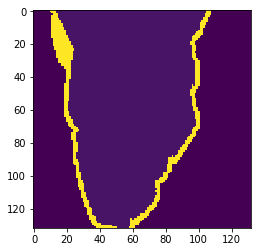

In [17]:
for bn in range(len(image_batches)):
    images = []
    for i in range(len(image_batches[bn])):
        img_temp = Image.open(f"{current_dir}\\data\\labels\\{image_batches[bn][i]}.png")
        images.append(np.array(img_temp.resize((316,316), resample=PIL.Image.NEAREST)))
        images[i] = images[i][92:224,92:224]
        #print(images[i].shape)
        plot.imshow(images[i])

    labels = []
    for i in range(len(image_batches[bn])):
        labels.append(np.zeros((132,132,22)))

    for l in range(len(image_batches[bn])):
        for m in range(0,132):
            for n in range(0,132):
                px = images[l][m,n]
                if px == 255:
                    labels[l][m,n,21] = 1
                else:
                    labels[l][m,n,px] = 1
        #print(labels[0].shape)
        

    y_train = []
    for i in range(len(labels)):
        y_train.append(np.expand_dims(labels[i], axis=0))
        #print(y_train[i].shape)
        
    np.save(f"{current_dir}/d/train_y/y_labels{bn}", y_train)
print("done")

done


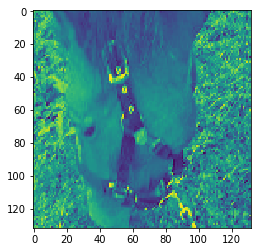

In [12]:
for bn in range(len(image_batches)):
    train_images = []

    for i in range(len(image_batches[bn])):
        img_temp = Image.open(f"{current_dir}\\data\\orig\\{image_batches[bn][i]}.jpg").convert('L') 
        train_images.append(np.array(img_temp.resize((316,316), resample=PIL.Image.NEAREST))/255)
        plot.imshow(train_images[i][92:224,92:224])
        #print(train_images[i].shape)
    
    x_train = []
    for i in range(len(train_images)):
        x_train.append(np.expand_dims(train_images[i], axis=2))
        x_train[i] = np.expand_dims(x_train[i], axis=0)
        #print(x_train[i].shape)
        
    np.save(f"{current_dir}/d/train_x/x_orig{bn}", x_train)
print("done")

In [14]:
x = np.load("./d/train_x/x_orig2.npy")
y = np.load("./d/train_y/y_labels2.npy")

(20, 1, 316, 316, 1)


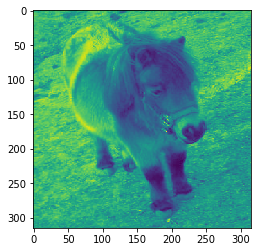

In [15]:
print(x.shape)
plot.imshow(x[9][0,0:-1,0:-1,0])

(20, 1, 132, 132, 22)


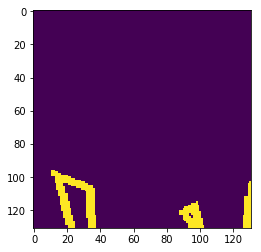

In [16]:
print(y.shape)
plot.imshow(y[9][0,0:-1,0:-1,21])

KeyboardInterrupt: 

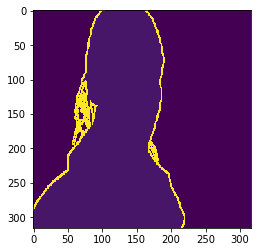

In [18]:
for bn in range(len(image_batches)):
    images = []
    for i in range(len(image_batches[bn])):
        img_temp = Image.open(f"{current_dir}\\data\\labels\\{image_batches[bn][i]}.png")
        images.append(np.array(img_temp.resize((316,316), resample=PIL.Image.NEAREST)))
        #print(images[i].shape)
        plot.imshow(images[i])

    labels = []
    for i in range(len(image_batches[bn])):
        labels.append(np.zeros((316,316,22)))

    for l in range(len(image_batches[bn])):
        for m in range(0,316):
            for n in range(0,316):
                px = images[l][m,n]
                if px == 255:
                    labels[l][m,n,21] = 1
                else:
                    labels[l][m,n,px] = 1
        #print(labels[0].shape)
        

    y_train = []
    for i in range(len(labels)):
        y_train.append(np.expand_dims(labels[i], axis=0))
        #print(y_train[i].shape)
        
    np.save(f"{current_dir}/d/train_y_pad/y_labels{bn}", y_train)
print("done")